In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/home/beans/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from blender_dataloader import *
from constants import *
from imports import *
from train_utils import get_torque

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
get_obs_per_sec()

(89.02562, 5.311092)

In [50]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

array([6.6949844, 6.3109093, 9.16094  , 8.691761 , 8.540795 , 6.240204 ,
       5.975263 , 9.070953 , 5.978112 , 9.446785 , 5.311092 , 7.6038175],
      dtype=float32)

In [51]:
dataloader = BlenderDataloader("trn", 6)

KeyboardInterrupt: 

In [ ]:
%%time
batch, is_first_in_seq = dataloader.get_batch()

(
    img, 
    aux_model,
    aux_calib,
    wp_angles,
    wp_headings,
    wp_curvatures,
    wp_rolls,
    wp_zs,
    aux_targets,
    to_pred_mask,
) = batch

is_first_in_seq

In [ ]:
wp_angles.shape, wp_headings.shape, wp_curvatures.shape, wp_rolls.shape, wp_zs.shape

In [ ]:
aux_model.shape, aux_calib.shape, aux_targets.shape

In [ ]:
# Angles
plt.hist((wp_angles*to_pred_mask).flatten().detach().cpu().numpy())

In [ ]:
# headings
plt.hist((wp_headings*to_pred_mask).flatten().detach().cpu().numpy())

In [ ]:
# curvatures
plt.hist((wp_curvatures*to_pred_mask).flatten().detach().cpu().numpy())

In [ ]:
# rolls
plt.hist((wp_rolls*to_pred_mask).flatten().detach().cpu().numpy())

In [ ]:
# zs
plt.hist((wp_zs*to_pred_mask).flatten().detach().cpu().numpy())

In [ ]:
to_pred_mask.sum() / to_pred_mask.numel()

In [ ]:
# Has stop
plt.hist(aux_targets[:,:,0].flatten().detach().cpu().numpy())

In [ ]:
# Stop dist
plt.hist((aux_targets[:,:,1]*aux_targets[:,:,0]).flatten().detach().cpu().numpy())

In [ ]:
# has lead
plt.hist(aux_targets[:,:,3].flatten().detach().cpu().numpy())

In [ ]:
# lead dist
plt.hist((aux_targets[:,:,4]*aux_targets[:,:,3]).flatten().detach().cpu().numpy())

In [ ]:
# lead speed
plt.hist((aux_targets[:,:,5]*aux_targets[:,:,3]).flatten().detach().cpu().numpy())

In [ ]:
from models import *
m = EffNet().to(device) 
#model_stem = "12.10_e45"
#m.load_state_dict(torch.load(f"{BESPOKE_ROOT}/models/m_{model_stem}.torch"), strict=False)

In [ ]:
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        wps_preds, aux_preds, obs_net_out  = m(img, aux_model, aux_calib)

In [ ]:
wp_angles_pred, wp_headings_pred, wp_curvatures_pred, wp_rolls_pred, wp_zs_pred = torch.chunk(wps_preds, 5, -1)

In [ ]:
aux_preds.shape

In [ ]:
sigmoid = torch.nn.Sigmoid()

In [ ]:
aux_preds[0,:,0], sigmoid(aux_preds[0,:,0])

In [18]:
t = get_torque(wp_angles, aux)
plt.hist(t.cpu().numpy().flatten())

NameError: name 'aux' is not defined

In [17]:
abs(t).max()

tensor(12240.8799, device='cuda:0')

(array([10., 19., 12.,  1.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([   2.3530273,  102.832375 ,  203.31172  ,  303.79108  ,
         404.27042  ,  504.74976  ,  605.2291   ,  705.70844  ,
         806.1878   ,  906.6671   , 1007.1465   ], dtype=float32),
 <BarContainer object of 10 artists>)

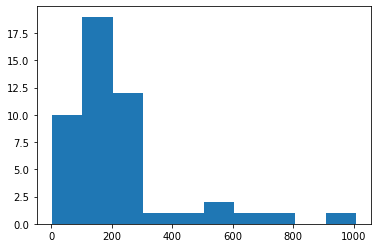

In [18]:
td = abs(t[:,1:,:] - t[:,:-1,:])
plt.hist(td.cpu().numpy().flatten())

In [19]:
abs(td).max()

tensor(1007.1465, device='cuda:0')

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)